In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

# Mount Google Drive (if using Colab)
from google.colab import drive
drive.mount('/content/drive')

# Set random seed untuk reprodusibilitas
np.random.seed(42)
tf.random.set_seed(42)

# Direktori dataset
# Correct the path to your training data if necessary
train_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/test'

# Data augmentasi dan preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 8 images belonging to 2 classes.
Found 1 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [19]:
# Fungsi untuk membuat model CNN
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(train_generator.class_indices), activation='softmax')
    ])
    return model

In [20]:
# Fungsi untuk plot grafik training
def plot_training_history(history, optimizer_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title(f'Model Accuracy ({optimizer_name})')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title(f'Model Loss ({optimizer_name})')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

In [21]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, optimizer_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix ({optimizer_name})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6250 - loss: 0.6791 - val_accuracy: 0.0000e+00 - val_loss: 0.9353
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step - accuracy: 0.3750 - loss: 1.0644 - val_accuracy: 1.0000 - val_loss: 0.4016
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6250 - loss: 0.9548 - val_accuracy: 1.0000 - val_loss: 0.5413
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step - accuracy: 0.6250 - loss: 0.6038 - val_accuracy: 1.0000 - val_loss: 0.6505
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6250 - loss: 0.7489 - val_accuracy: 0.0000e+00 - val_loss: 0.7669
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step - accuracy: 0.6250 - loss: 0.6434 - val_accuracy: 0.0000e+00 - val_loss: 0.8344
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6208 - val_accuracy: 0.0000e+00 - val_loss: 0.8365
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6535 - val_accuracy: 0.0000e+00 - val_loss: 0.849

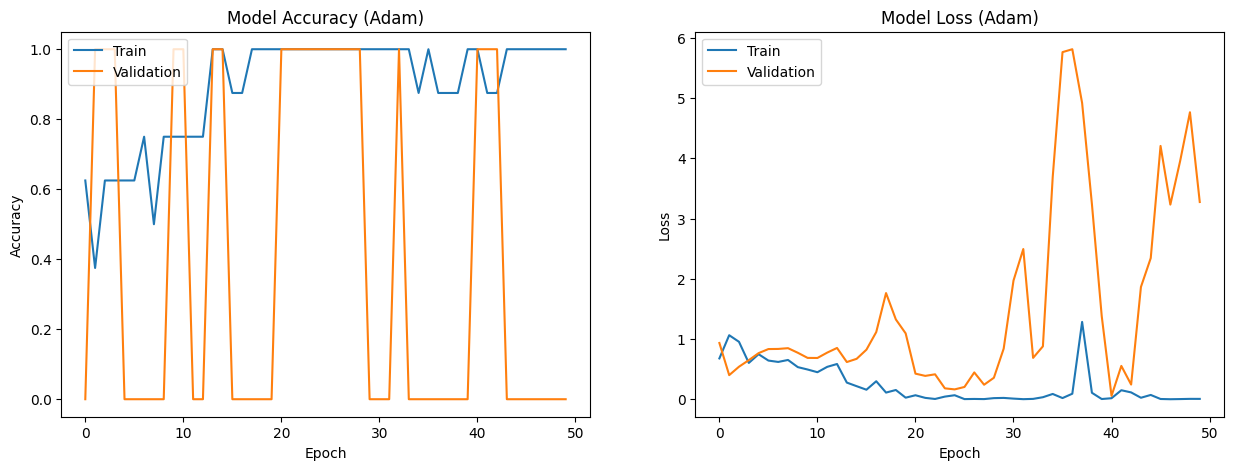

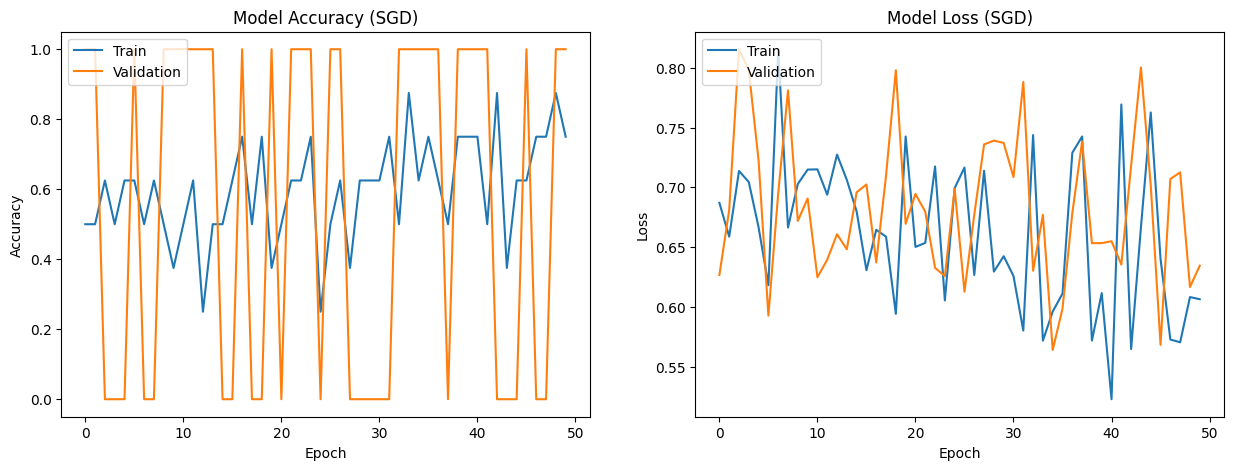

In [23]:
 #Training dengan optimizer Adam
model_adam = create_cnn_model()
model_adam.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_adam = model_adam.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

# Training dengan optimizer SGD
model_sgd = create_cnn_model()
model_sgd.compile(optimizer='sgd',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history_sgd = model_sgd.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

# Plot training history
plot_training_history(history_adam, 'Adam')
plot_training_history(history_sgd, 'SGD')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


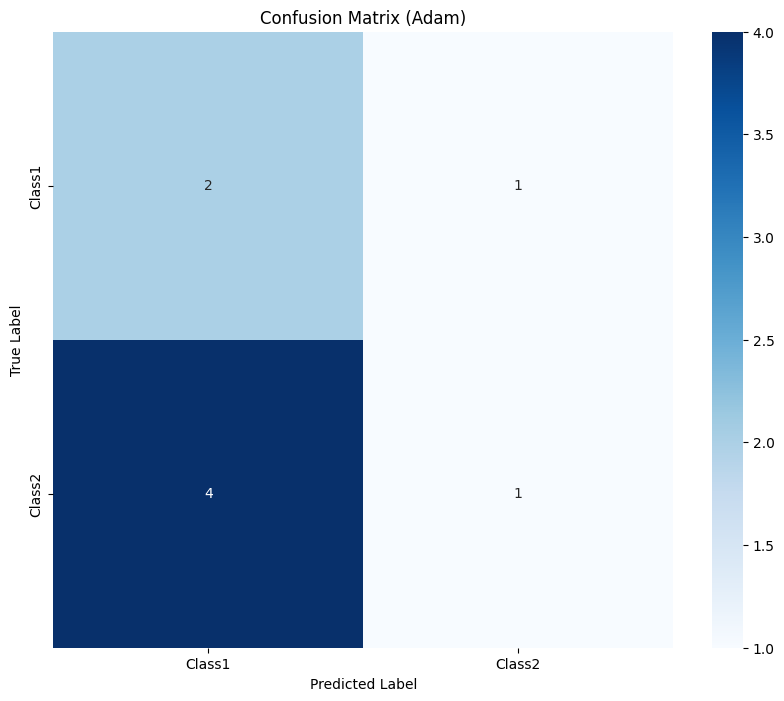

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.3750 - loss: 2.0673

Test accuracy (Adam): 0.3750
Test loss (Adam): 2.0673
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


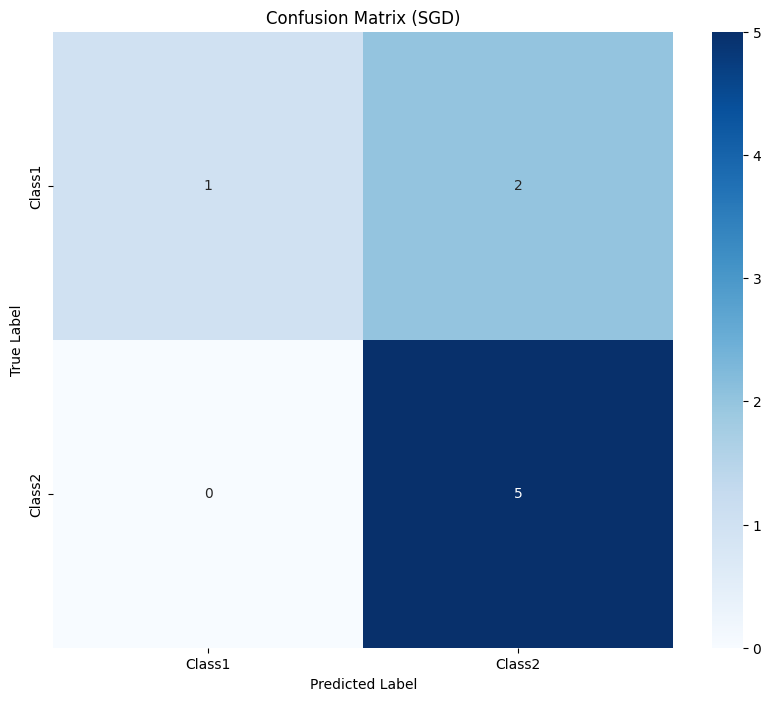

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.7500 - loss: 0.5949



Test accuracy (SGD): 0.7500
Test loss (SGD): 0.5949


In [25]:
# Evaluasi model dan plot confusion matrix
def evaluate_model(model, generator, optimizer_name):
    predictions = model.predict(generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = generator.classes
    class_names = list(generator.class_indices.keys())
    plot_confusion_matrix(y_true, y_pred, class_names, optimizer_name)

    # Print evaluation metrics
    test_loss, test_accuracy = model.evaluate(generator)
    print(f'\nTest accuracy ({optimizer_name}): {test_accuracy:.4f}')
    print(f'Test loss ({optimizer_name}): {test_loss:.4f}')
# Evaluasi kedua model
evaluate_model(model_adam, test_generator, 'Adam')
evaluate_model(model_sgd, test_generator, 'SGD')

# Simpan model
model_adam.save('cnn_model_adam.h5')
model_sgd.save('cnn_model_sgd.h5')